# diabetes

In [235]:
import numpy as np
import pandas as pd

In [236]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## preprocessing

In [238]:
x = train_data.drop('Survived', axis=1)
y = train_data["Survived"]

In [239]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
x = pd.get_dummies(train_data[features])
x_test = pd.get_dummies(test_data[features])

In [240]:
x = np.array(x)
y = np.array(y)

In [241]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x = scaler.fit_transform(x)

# cross validation

In [242]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

kf = StratifiedKFold(n_splits=9)

# random forest

In [243]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

acc_total = []
for train, validation in kf.split(x, y):

    x_train = x[train]
    y_train = y[train]

    x_validation = x[validation]
    y_validation = y[validation]

    #model
    rf.fit(x, y)

    #prediction
    y_pred = rf.predict(x_validation)
    y_pred = (y_pred > 0.5).astype('int32')

    acc = accuracy_score(y_true=y_validation, y_pred=y_pred)
    acc_total.append(acc)


x_rf = np.mean(acc_total)

predictions = rf.predict(x_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

np.mean(acc_total)

c:\Users\pooria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8170594837261506

# 1.naive base

In [244]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

acc_total = []
for train, validation in kf.split(x, y):

    x_train = x[train]
    y_train = y[train]

    x_test = x[validation]
    y_test = y[validation]

    #model
    gnb.fit(x, y)

    #prediction
    y_pred = gnb.predict(x_test)
    y_pred = (y_pred > 0.5).astype('int32')

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    acc_total.append(acc)


x_gnb = np.mean(acc_total)
np.mean(acc_total)


# predictions = gnb.predict(x_test)
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)


0.8002244668911336

# 2.knn

In [245]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)

acc_total = []
for train, validation in kf.split(x, y):

    x_train = x[train]
    y_train = y[train]

    x_test = x[validation]
    y_test = y[validation]

    #model
    knn.fit(x, y)

    #prediction
    y_pred = knn.predict(x_test)
    y_pred = (y_pred > 0.5).astype('int32')

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    acc_total.append(acc)


x_knn = np.mean(acc_total)
np.mean(acc_total)



0.8047138047138047

# 3.decision tree

In [246]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, min_samples_split=4, min_samples_leaf=2)

acc_total = []
for train, validation in kf.split(x, y):

    x_train = x[train]
    y_train = y[train]

    x_test = x[validation]
    y_test = y[validation]

    #model
    dt.fit(x, y)

    #prediction
    y_pred = dt.predict(x_test)
    y_pred = (y_pred > 0.5).astype('int32')

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    acc_total.append(acc)


x_dt = np.mean(acc_total)
np.mean(acc_total)




0.813692480359147

# 4.random forest

# 5.svm

In [247]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

acc_total = []
for train, validation in kf.split(x, y):

    x_train = x[train]
    y_train = y[train]

    x_test = x[validation]
    y_test = y[validation]

    #model
    svm.fit(x, y)

    #prediction
    y_pred = svm.predict(x_test)
    y_pred = (y_pred > 0.5).astype('int32')

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    acc_total.append(acc)


x_svm = np.mean(acc_total)
np.mean(acc_total)

0.7867564534231201

# 6.logistic regresion

In [248]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

acc_total = []
for train, validation in kf.split(x, y):

    x_train = x[train]
    y_train = y[train]

    x_test = x[validation]
    y_test = y[validation]

    #model
    lr.fit(x, y)

    #prediction
    y_pred = lr.predict(x_test)
    y_pred = (y_pred > 0.5).astype('int32')

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    acc_total.append(acc)


x_lr = np.mean(acc_total)
np.mean(acc_total)

0.8002244668911336

# 7.ANN

In [249]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=64, max_iter=100)

acc_total = []
for train, validation in kf.split(x, y):

    x_train = x[train]
    y_train = y[train]

    x_test = x[validation]
    y_test = y[validation]

    #model
    ann.fit(x, y)

    #prediction
    y_pred = ann.predict(x_test)
    y_pred = (y_pred > 0.5).astype('int32')

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    acc_total.append(acc)


x_ann = np.mean(acc_total)
np.mean(acc_total)

c:\Users\pooria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pooria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pooria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pooria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the 

0.8092031425364757

# comparison

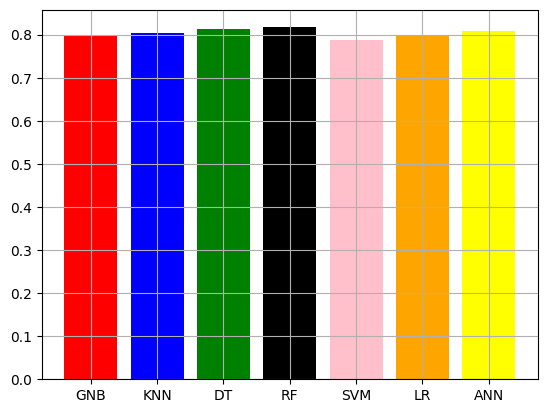

In [250]:
import matplotlib.pyplot as plt
acc_x = [x_gnb, x_knn, x_dt, x_rf, x_svm, x_lr, x_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(title, acc_x, color= colors)
plt.grid()
plt.show()